# 5.1- NLP

NLP trata de aplicaciones que entiendan nuestro idioma, reconocimiento de voz, traducción, comprensión semántica, análisis de sentimiento..

**Usos**

+ Motores de búsqueda
+ Feed de redes sociales
+ Asistentes de voz 
+ Filtros de span
+ Chatbots
+ IVR

**Librerías**

+ NLTK
+ Spacy
+ TFIDF
+ OpenNLP
+ HuggingFace
+ Twilio

La dificultad del NLP está en varios niveles:

+ Ambigüedad:

  * Nivel léxico: por ejemplo, varios significados
  * Nivel referencial: anáforas, metáforas, etc...
  * Nivel estructural: la semántica es necesaria para entender la estructura de una oración
  * Nivel pragmático: dobles sentidos, ironía, humor
  
+ Detección de espacios
+ Recepción imperfecta: acentos, -ismos, OCR

El proceso es similar que en USL, primero se vectorizan las palabras y después se miden sus distancias/similitudes. 

In [1]:
# lista de 100 peliculas

titles=open('../data/title_list.txt').read().split('\n')[:100]

titles[:10]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca',
 "One Flew Over the Cuckoo's Nest",
 'Gone with the Wind',
 'Citizen Kane',
 'The Wizard of Oz',
 'Titanic']

In [2]:
synopsis=open('../data/synopses_list.txt').read().split('\n BREAKS HERE')[:100]

synopsis[0][:100]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone h"

In [3]:
len(synopsis)

100

### Limpieza

In [ ]:
%pip install spacy
%pip install nltk

In [6]:
import string

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


from nltk import word_tokenize

import re

[nltk_data] Downloading package stopwords to /Users/iudh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!python -m spacy download en_core_web_sm  # ejecutar en terminal

%pip install spacy-lookups-data

In [29]:
nlp=spacy.load('en_core_web_sm')   # modelo preentrenado en ingles

# stopwords
stop_words_en=set(stopwords.words('english') + list(STOP_WORDS) + list(nlp.Defaults.stop_words) + ['edit', 'plot'])

stop_words=stop_words_en

In [30]:
synopsis[0][:400]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a covet"

In [31]:
def spacy_tokenizer(frase):

    tokens=word_tokenize(frase)    # lista de palabras

    filtrado=[]

    for palabra in tokens:

        lemma=nlp(str(palabra))[0].lemma_.lower().strip()
        
        if lemma not in stop_words and re.search('^[a-zA-Z]+$', lemma):
            filtrado.append(lemma)
            
    return filtrado

In [32]:
spacy_tokenizer(synopsis[0][:400])

['day',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hear',
 'request',
 'role',
 'godfather',
 'new',
 'york',
 'crime',
 'family',
 'vito',
 'young',
 'son',
 'michael',
 'marine',
 'corps',
 'uniform',
 'introduce',
 'girlfriend',
 'kay',
 'adam',
 'family',
 'sprawl',
 'reception',
 'vito',
 'godson',
 'johnny',
 'fontane',
 'popular',
 'singer',
 'plead',
 'help',
 'secure',
 'covet']

### TFIDF (term frequency inverse document frequency)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf=TfidfVectorizer(min_df=0.15, tokenizer=spacy_tokenizer)

In [35]:
%%time 

tfidf_matrix=tfidf.fit_transform(synopsis)

CPU times: user 8min 13s, sys: 1.04 s, total: 8min 14s
Wall time: 8min 15s


In [36]:
tfidf_matrix.shape, len(synopsis)

((100, 279), 100)

In [37]:
(str(tfidf_matrix[0]).split('\n'))[:10]

['  (0, 264)\t0.05195778473541241',
 '  (0, 124)\t0.0683021208034531',
 '  (0, 54)\t0.06455276766523606',
 '  (0, 53)\t0.0657425073188974',
 '  (0, 195)\t0.14229338623802046',
 '  (0, 245)\t0.033529967786142756',
 '  (0, 2)\t0.06699030554572089',
 '  (0, 233)\t0.0657425073188974',
 '  (0, 221)\t0.10251412342157659',
 '  (0, 263)\t0.07114669311901023']

In [38]:
import pandas as pd

df=pd.DataFrame(tfidf_matrix)

In [39]:
df.head()

,0
0,"(0, 264)\t0.05195778473541241\n (0, 124)\t0..."
1,"(0, 3)\t0.07398606760004768\n (0, 14)\t0.07..."
2,"(0, 95)\t0.07268504463149769\n (0, 187)\t0...."
3,"(0, 156)\t0.07117919158660735\n (0, 134)\t0..."
4,"(0, 246)\t0.07007639574163582\n (0, 102)\t0..."


In [40]:
terms=tfidf.get_feature_names_out()

terms[:15]

array(['able', 'accept', 'act', 'admit', 'affair', 'agree', 'allow',
       'american', 'apartment', 'appear', 'approach', 'arm', 'army',
       'arrange', 'arrest'], dtype=object)

In [41]:
len(terms)

279

In [42]:
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

tfidf_df.head()

,able,accept,act,admit,affair,agree,allow,american,apartment,appear,...,win,window,witness,woman,work,world,wound,year,york,young
0,0.0,0.186982,0.06699,0.000000,0.000000,0.046826,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.093651,0.131485,0.046826
1,0.0,0.000000,0.00000,0.073986,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.098988,0.058507,0.0,0.095312,0.000000,0.000000
2,0.0,0.000000,0.00000,0.000000,0.000000,0.050806,0.122868,0.000000,0.0,0.0,...,0.074108,0.0,0.067626,0.055614,0.000000,0.155936,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.00000,0.000000,0.140051,0.000000,0.000000,0.094990,0.0,0.0,...,0.131584,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.045105,0.189979,0.000000
4,0.0,0.000000,0.00000,0.000000,0.000000,0.054435,0.065822,0.076426,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.056535,0.000000,0.0,0.000000,0.000000,0.000000


In [43]:
tfidf_df.shape

(100, 279)

### Distancias

In [44]:
from sklearn.metrics.pairwise import cosine_similarity as cos

In [45]:
distancias=1-cos(tfidf_matrix)

distancias.shape

(100, 100)

In [46]:
pd.DataFrame(distancias).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-2.220446e-16,0.782325,8.613287e-01,0.728574,7.920806e-01,0.890847,0.686216,0.807017,0.787658,0.892113,...,0.711455,0.854941,0.793626,0.839070,0.738379,0.704077,0.840584,0.760392,0.819074,0.836106
1,7.823252e-01,0.000000,7.356491e-01,0.856228,7.398684e-01,0.773820,0.757898,0.741708,0.755691,0.880094,...,0.736923,0.823799,0.815867,0.861396,0.784921,0.896793,0.873847,0.725600,0.809578,0.881673
2,8.613287e-01,0.735649,-2.220446e-16,0.798006,7.681819e-01,0.794821,0.709619,0.744165,0.801774,0.822027,...,0.837733,0.837956,0.697371,0.797606,0.823124,0.905449,0.857548,0.785374,0.802764,0.856607
3,7.285736e-01,0.856228,7.980060e-01,0.000000,7.984989e-01,0.799007,0.751026,0.667497,0.838479,0.820019,...,0.823748,0.838125,0.759854,0.747629,0.710820,0.818018,0.800954,0.788693,0.807612,0.834004
4,7.920806e-01,0.739868,7.681819e-01,0.798499,-2.220446e-16,0.710904,0.698729,0.798067,0.705634,0.773711,...,0.676539,0.764317,0.737144,0.731261,0.606953,0.706905,0.751714,0.623090,0.637548,0.748952


### Clustering

In [47]:
import warnings
warnings.simplefilter('ignore')

import pylab as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')

import numpy as np

In [49]:
from umap import UMAP

In [50]:
umap=UMAP(n_neighbors=5, random_state=42)

emb=umap.fit_transform(distancias)

In [51]:
emb[:5]

array([[ 2.4098988 ,  6.1998725 ],
       [ 2.3289557 ,  7.886638  ],
       [ 3.086704  , 10.655934  ],
       [ 0.37474775,  5.308444  ],
       [ 1.0913645 ,  8.477825  ]], dtype=float32)

In [52]:
emb.shape

(100, 2)

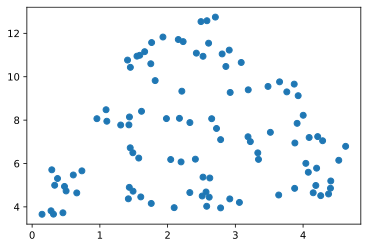

In [53]:
plt.scatter(emb[:, 0], emb[:, 1]);

In [54]:
# DBSCAN

from sklearn.cluster import DBSCAN

In [55]:
dbscan=DBSCAN(eps=0.8, min_samples=7)

In [56]:
dbscan.fit(emb)

DBSCAN(eps=0.8, min_samples=7)

In [58]:
clusters=dbscan.labels_

### titulos de los clusters

In [59]:
def get_titles_from_cluster(c):
    return pd.Series(titles)[clusters==c]

In [65]:
get_titles_from_cluster(-1)

0                          The Godfather
11                The Godfather: Part II
12                                Psycho
17                    The Sound of Music
26                 It's a Wonderful Life
41                The Philadelphia Story
42                 To Kill a Mockingbird
54                         The Apartment
59                            Goodfellas
65                     The King's Speech
67                    A Place in the Sun
81    Close Encounters of the Third Kind
86                          Pulp Fiction
87                     The African Queen
89                  Mutiny on the Bounty
96                           Rear Window
dtype: object

In [66]:
def get_df_from_cluster(c):
    return tfidf_df[clusters==c]

In [67]:
get_df_from_cluster(2).describe()

,able,accept,act,admit,affair,agree,allow,american,apartment,appear,...,win,window,witness,woman,work,world,wound,year,york,young
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.014820,0.033252,0.009589,0.014629,0.041275,0.034451,0.015497,0.020728,0.025824,0.025122,...,0.019231,0.035896,0.007320,0.067356,0.056486,0.038208,0.014120,0.049526,0.033201,0.031860
std,0.032460,0.051517,0.029895,0.032578,0.098971,0.046922,0.033885,0.056878,0.067248,0.053619,...,0.044838,0.091575,0.022264,0.085526,0.061918,0.059526,0.048465,0.063993,0.080356,0.036758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.045452,0.050654,0.000000,0.000000,0.032124,0.000000,0.017854
75%,0.000000,0.068366,0.000000,0.000000,0.000000,0.051100,0.000000,0.000000,0.000000,0.012196,...,0.000000,0.000000,0.000000,0.101275,0.096270,0.068290,0.000000,0.078942,0.000000,0.055960
max,0.088913,0.170759,0.127478,0.093861,0.399303,0.171644,0.141519,0.236528,0.251550,0.227937,...,0.176373,0.443047,0.090270,0.268579,0.233289,0.196874,0.247693,0.239614,0.337984,0.113912


In [70]:
top_words=get_df_from_cluster(3).T.sum(axis=1).sort_values(ascending=False)

top_words.head()

army       2.876303
soldier    2.710691
war        2.406245
kill       2.171828
general    1.961687
dtype: float64

## NLP_es 

##### similitud

# WordClouds

#### Mascara

## NER

### Transformers (creacion de texto)